In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np

2024-06-01 11:32:00.964756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [4]:
# Define the ResNet50 model
def create_resnet50_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
# Create the model
input_shape = x_train.shape[1:]
model = create_resnet50_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2024-06-01 11:32:38.211984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


94765736/94765736 [==============================] - 7s 0us/step


In [6]:
# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [10]:
# Train the model

# Without data augmentation
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

# With data augmentation
# history = model.fit(datagen.flow(x_train, y_train, batch_size=64), validation_data=(x_val, y_val), epochs=50)

Epoch 1/10
1172/1172 [==============================] - 146s 124ms/step - loss: 2.2074 - accuracy: 0.0389 - val_loss: 2.0720 - val_accuracy: 0.0571
Epoch 2/10
1172/1172 [==============================] - 130s 111ms/step - loss: 2.1564 - accuracy: 0.0311 - val_loss: 2.0466 - val_accuracy: 0.2092
Epoch 3/10
1172/1172 [==============================] - 133s 113ms/step - loss: 2.1351 - accuracy: 0.0456 - val_loss: 2.1047 - val_accuracy: 0.0054
Epoch 4/10
1172/1172 [==============================] - 131s 111ms/step - loss: 2.1200 - accuracy: 0.0420 - val_loss: 1.9940 - val_accuracy: 0.1405
Epoch 5/10
1172/1172 [==============================] - 133s 114ms/step - loss: 2.1168 - accuracy: 0.0421 - val_loss: 2.0076 - val_accuracy: 0.1204
Epoch 6/10
1172/1172 [==============================] - 134s 115ms/step - loss: 2.1099 - accuracy: 0.0603 - val_loss: 2.0038 - val_accuracy: 0.0697
Epoch 7/10
1172/1172 [==============================] - 135s 116ms/step - loss: 2.1039 - accuracy: 0.0705 - val_

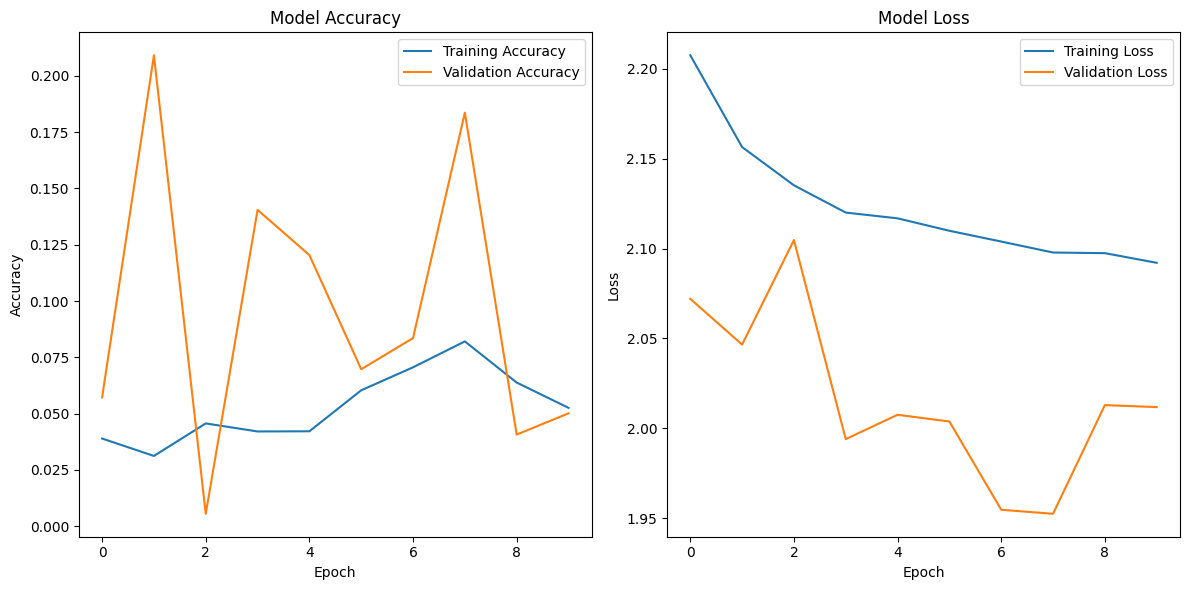

In [12]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')